# Exercise 10
### $\textit{Confidence intervals}$

Given is the likelihood function for a measured value $x$ at a given parameter $a$

$L(X;a) = \frac{1}{\pi} \frac{1}{1+(x-a)^2}$ mit $a > 0$.

>**(a) Using the Neyman construction, determine the central frequentist $90 \%$ confidence interval for $a$
when a value $𝑥 = 10$ was measured.**

In [10]:
import numpy as np
import matplotlib.pyplot as plt

The integral of the probability function is analytically determined and equals to:

$P(x;a) = \frac{1}{\pi} arctan(a-x)$

The full area under the function for $x = 10$ is given by:


In [11]:
p = (1/ np.pi) * ( np.arctan(np.Inf) - np.arctan(-10) )
print(np.absolute(p))
print(0.05*np.absolute(p))

0.9682744825694465
0.04841372412847233



$ \frac{1}{\pi} \left( \arctan(\infty) - \arctan(-10) \right)  =   \frac{1}{\pi} \frac{\pi}{2} + \frac{1}{\pi} 1.4711276743037  = 0.9682744825694465$

Since we want the central 90% of the area under the curve, we need to determine for which interval the left and right edges of the area equal to 5% of the total area. This equals to $0.04841372412847233$.

For the lower limit we get this equation:

$\frac{1}{\pi} \arctan(I_{unten} - 10) - \frac{1}{\pi} \arctan(-10) = 0.04841372412847233$

$\Leftrightarrow \arctan(I_{unten}-10) = 0.04841372412847233 \cdot \pi + \arctan(-10)$

$\Leftrightarrow I_{unten} - 10= \tan \left( 0.04841372412847233 \cdot \pi + \arctan(-10) \right)$

$\Leftrightarrow I_{unten} = \tan \left( 0.04841372412847233 \cdot \pi + \arctan(-10) \right) + 10 = 6.112318096783665$

In [12]:
l_unten = np.tan(0.04841372412847233 * np.pi + np.arctan(-10)) +10
l_unten

6.112318096783665

For the upper limit we get this equation:
$\frac{1}{\pi} \arctan(\infty) - \frac{1}{\pi} \arctan(I_{oben}-10) = 0.04841372412847233$

$\Leftrightarrow -\arctan(I_{oben}-10) = 0.04841372412847233 \cdot \pi - \arctan(\infty)$

$\Leftrightarrow \arctan(I_{oben}-10) = \arctan(\infty) - 0.04841372412847233 \cdot \pi$

$\Leftrightarrow I_{oben} - 10= \tan \left( \arctan(\infty) - 0.04841372412847233 \cdot \pi \right)$

$\Leftrightarrow I_{oben} = \tan \left( \arctan(\infty) - 0.04841372412847233 \cdot \pi \right) + 10 = 16.52400912399286$

In [13]:
l_oben = np.tan(np.arctan(np.Inf) - 0.04841372412847233 * np.pi) +10
l_oben

16.52400912399286

The interval for which the parameter $a$ lies in with $90\%$ confidence for the measured $x$ value of $10$ is $a\in [6.112318, 16.524009]$.

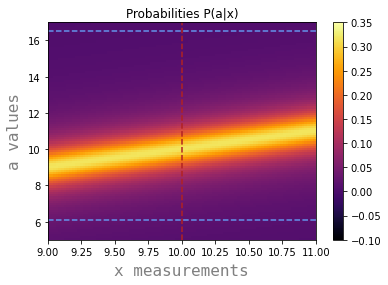

In [16]:
#heatmap configurations

x, a = np.meshgrid(np.linspace(9, 11, 100), np.linspace(5, 17, 100))
z = 1/(np.pi *(1+(x-a)**2)) #probability density

z = z[:-1, :-1]

fig, ax = plt.subplots()

c = ax.pcolormesh(x, a, z, cmap='inferno', vmin=-0.1, vmax=0.35)
ax.set_title('Probabilities P(a|x)')

ax.axis([x.min(), x.max(), a.min(), a.max()])

fig.colorbar(c, ax=ax)
plt.xlabel("x measurements", family='monospace', color='grey', weight='normal', size = 16, labelpad = 6)
plt.ylabel("a values", family='monospace', color='grey', weight='normal', size = 16, labelpad = 6)
plt.axhline(y=l_unten, color='cornflowerblue', linestyle='dashed')
plt.axhline(y=l_oben, color='cornflowerblue', linestyle='dashed')
plt.axvline(x = 10, color='firebrick', linestyle='dashed')

plt.show()

The heatmap plot shows the probabilities of $a$ for certain measurements of $x$. The blue dashed lines are the confidence interval of $a$ for $x=10$. The red dashed line is for $x=10$.

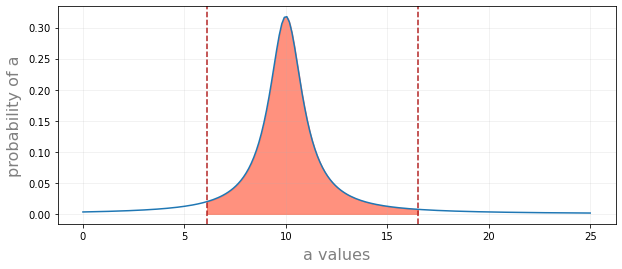

In [18]:
def f(n, x=10):
    return 1/(np.pi *(1+(x-n)**2))

#plot

plt.figure(figsize=(10, 4))

b = np.linspace(0, 25, 200)
plt.plot(b,f(b)) 
plt.xlabel("a values", color='grey', weight='normal', size = 16, labelpad = 6)
plt.ylabel("probability of a", color='grey', weight='normal', size = 16, labelpad = 6)

k = np.arange(l_unten, l_oben, 0.1)

plt.fill_between(k, f(k), color='tomato', alpha=.7)
plt.grid( alpha=.2)

plt.axvline(x=l_unten, color='firebrick', linestyle='dashed')
plt.axvline(x=l_oben, color='firebrick', linestyle='dashed')

plt.show()



>**(b) Assuming a uniform prior distribution in $a$, determine the central Bayesian credibility interval.
(Both sides outside the central confidence interval have the same probability content).**